# Employee Turn-Over EDA and Predictive Models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('Employee-turnover.csv')
df.head()

,Employee Count,Employee ID,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,...,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)
0,1,1,Sales,Sales Executive,Female,41,Single,College,Life Sciences,Travel_Rarely,...,8,6,4,0,5,Medium,0,Bad,Low,Yes
1,1,2,Research & Development,Research Scientist,Male,49,Married,Below College,Life Sciences,Travel_Frequently,...,10,10,7,1,7,High,3,Better,Very High,No
2,1,4,Research & Development,Laboratory Technician,Male,37,Single,College,Other,Travel_Rarely,...,7,0,0,0,0,Low,3,Bad,Medium,Yes
3,1,5,Research & Development,Research Scientist,Female,33,Married,Master,Life Sciences,Travel_Frequently,...,8,8,7,3,0,Very High,3,Better,High,No
4,1,7,Research & Development,Laboratory Technician,Male,27,Married,Below College,Medical,Travel_Rarely,...,6,2,2,2,2,Low,3,Better,Very High,No


In [3]:
df.shape

(1470, 29)

In [4]:
df.isnull().sum()

Employee Count                0
Employee ID                   0
Department                    0
Job Role                      0
Gender                        0
Age                           0
Marital Status                0
Education                     0
Education Field               0
Business Travel               0
Distance From Home (kms)      0
Job Involvement               0
Job Level                     0
Job Satisfaction              0
Monthly Income (USD)          0
Salary Hike (%)               0
Stock Option Level            0
Over Time                     0
No. of Companies Worked       0
Total Working Years           0
Years At Company              0
Years In Current Role         0
Years Since Last Promotion    0
Years With Curr Manager       0
Environment Satisfaction      0
Training Times Last Year      0
Work Life Balance             0
Relationship Satisfaction     0
Attrition (Yes/No)            0
dtype: int64

In [5]:
df['Employee Count'].describe()

count    1470.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: Employee Count, dtype: float64

In [6]:
# We can remove this column since it doesn't help us in any way, values are same for all the records,
# no deviation and doesn't make sense
df.drop('Employee Count',axis=1,inplace=True)
df

,Employee ID,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,Distance From Home (kms),...,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)
0,1,Sales,Sales Executive,Female,41,Single,College,Life Sciences,Travel_Rarely,1,...,8,6,4,0,5,Medium,0,Bad,Low,Yes
1,2,Research & Development,Research Scientist,Male,49,Married,Below College,Life Sciences,Travel_Frequently,8,...,10,10,7,1,7,High,3,Better,Very High,No
2,4,Research & Development,Laboratory Technician,Male,37,Single,College,Other,Travel_Rarely,2,...,7,0,0,0,0,Low,3,Bad,Medium,Yes
3,5,Research & Development,Research Scientist,Female,33,Married,Master,Life Sciences,Travel_Frequently,3,...,8,8,7,3,0,Very High,3,Better,High,No
4,7,Research & Development,Laboratory Technician,Male,27,Married,Below College,Medical,Travel_Rarely,2,...,6,2,2,2,2,Low,3,Better,Very High,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,Research & Development,Laboratory Technician,Male,36,Married,College,Medical,Travel_Frequently,23,...,17,5,2,0,3,High,3,Better,High,No
1466,2062,Research & Development,Healthcare Representative,Male,39,Married,Below College,Medical,Travel_Rarely,6,...,9,7,7,1,7,Very High,5,Better,Low,No
1467,2064,Research & Development,Manufacturing Director,Male,27,Married,Bachelor,Life Sciences,Travel_Rarely,4,...,6,6,2,0,3,Medium,0,Better,Medium,No
1468,2065,Sales,Sales Executive,Male,49,Married,Bachelor,Medical,Travel_Frequently,2,...,17,9,6,0,8,Very High,3,Good,Very High,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Employee ID                 1470 non-null   int64 
 1   Department                  1470 non-null   object
 2   Job Role                    1470 non-null   object
 3   Gender                      1470 non-null   object
 4   Age                         1470 non-null   int64 
 5   Marital Status              1470 non-null   object
 6   Education                   1470 non-null   object
 7   Education Field             1470 non-null   object
 8   Business Travel             1470 non-null   object
 9   Distance From Home (kms)    1470 non-null   int64 
 10  Job Involvement             1470 non-null   object
 11  Job Level                   1470 non-null   int64 
 12  Job Satisfaction            1470 non-null   object
 13  Monthly Income (USD)        1470 non-null   int6

In [8]:
df['Attrition'] = df['Attrition (Yes/No)'].apply(lambda x: 1 if x=='Yes' else 0)
df.head()
print(df['Attrition'].value_counts())
print(df['Attrition (Yes/No)'].value_counts())

0    1233
1     237
Name: Attrition, dtype: int64
No     1233
Yes     237
Name: Attrition (Yes/No), dtype: int64


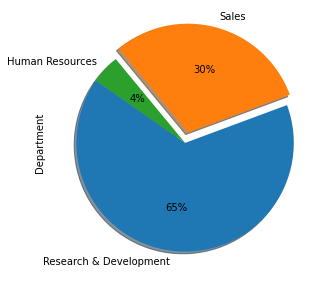

In [9]:
#Department Column
plt.figure(figsize=(10,5))
df['Department'].value_counts(normalize=True).plot.pie(autopct='%1.f%%',shadow=True,explode=(0,0.1,0),startangle=145)
plt.show()

> 1. 65% of employees are from R&D Department
> 2. 30% of employees are from Sales Dept.
> 3. ~5% of employees are from HR Dept.

In [10]:
#Checking Attrition Rate for each category, we can create a function for that.
def calculate_attrition_rate(df,col):
    temp_df = pd.DataFrame(columns=['Category','Attrition Rate'])
    for cat in df[col].unique():
        attrition_count = df[(df[col]==cat) & (df['Attrition']==1)].shape[0]
        total_count = df[df[col]==cat].shape[0]
        temp_df = temp_df.append({'Category':cat,'Attrition Rate':(attrition_count/total_count * 100)},ignore_index=True)
    return temp_df.sort_values(by='Attrition Rate',ascending=False)
calculate_attrition_rate(df,'Department')

,Category,Attrition Rate
0,Sales,20.627803
2,Human Resources,19.047619
1,Research & Development,13.839750


In [11]:
#Job Role
df['Job Role'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: Job Role, dtype: int64

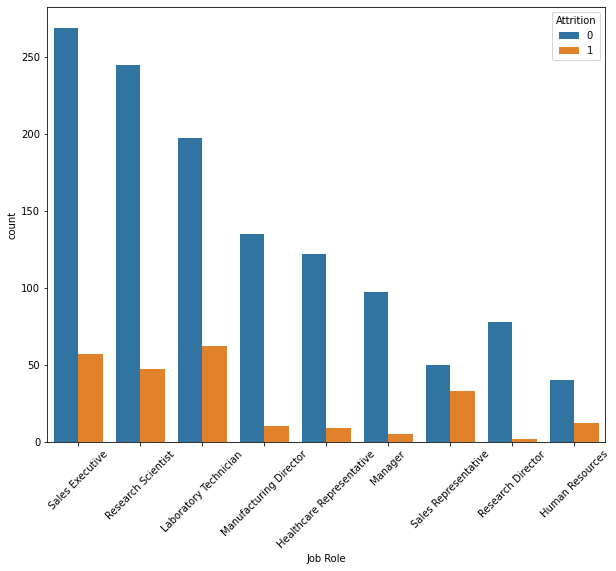

In [12]:
plt.figure(figsize=(10,8))
sns.countplot(x='Job Role',data=df,hue='Attrition')
plt.xticks(rotation=45)
plt.show()

In [13]:
calculate_attrition_rate(df,'Job Role')

,Category,Attrition Rate
6,Sales Representative,39.759036
2,Laboratory Technician,23.938224
8,Human Resources,23.076923
0,Sales Executive,17.484663
1,Research Scientist,16.095890
3,Manufacturing Director,6.896552
4,Healthcare Representative,6.870229
5,Manager,4.901961
7,Research Director,2.500000


In [14]:
#Check Gender only Male and Female
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [15]:
calculate_attrition_rate(df,'Gender')

,Category,Attrition Rate
1,Male,17.006803
0,Female,14.795918


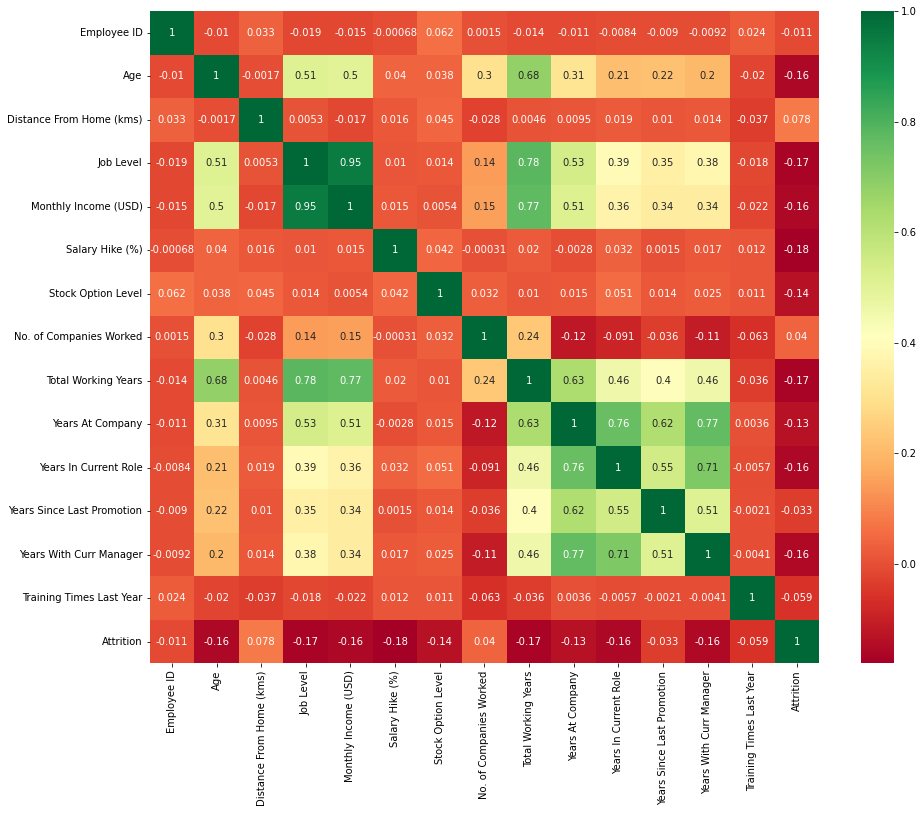

In [16]:
corr = df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr,annot=True,cmap='RdYlGn')
plt.show()

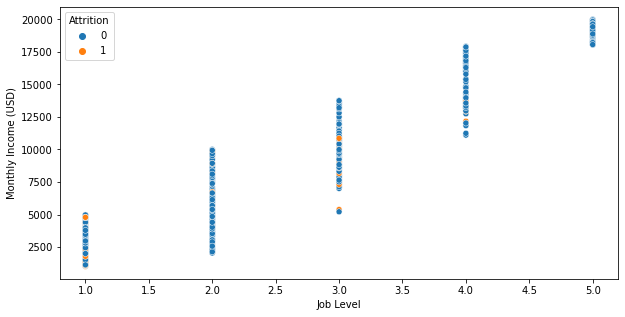

In [17]:
# We will study high correlations > 0.6 just to eliminate similar columns/ remove multi-collinearity.
# For example, let's see the columns Monthly Income (USD) and Job Level with pearson coefficient = 0.95.
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x='Job Level',y='Monthly Income (USD)',hue='Attrition')
plt.show()

> We can clearly see as Job Level rises, monthly income will rise as well. That's why having both these 2 columns for our model would be harmful hence we should remove 1 of them.

<AxesSubplot:xlabel='Job Level', ylabel='count'>

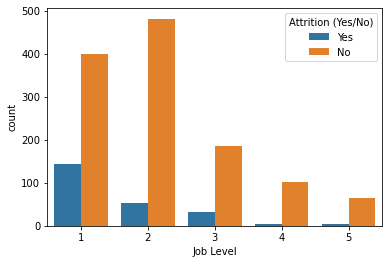

In [18]:
sns.countplot(data=df,x='Job Level',hue='Attrition (Yes/No)')

> As job level increases, number of attritions decreases. <br>
> We can also see this from Heatmap that Job level and Attrition have negative correlation.

In [19]:
df.head()

,Employee ID,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,Distance From Home (kms),...,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No),Attrition
0,1,Sales,Sales Executive,Female,41,Single,College,Life Sciences,Travel_Rarely,1,...,6,4,0,5,Medium,0,Bad,Low,Yes,1
1,2,Research & Development,Research Scientist,Male,49,Married,Below College,Life Sciences,Travel_Frequently,8,...,10,7,1,7,High,3,Better,Very High,No,0
2,4,Research & Development,Laboratory Technician,Male,37,Single,College,Other,Travel_Rarely,2,...,0,0,0,0,Low,3,Bad,Medium,Yes,1
3,5,Research & Development,Research Scientist,Female,33,Married,Master,Life Sciences,Travel_Frequently,3,...,8,7,3,0,Very High,3,Better,High,No,0
4,7,Research & Development,Laboratory Technician,Male,27,Married,Below College,Medical,Travel_Rarely,2,...,2,2,2,2,Low,3,Better,Very High,No,0


In [20]:
#We can either remove Job Level or Monthly Income (USD) column. I will remove income because Job level has slightly
#better correlation with other independent variables which is required.
#Even removing the total working years as it is highly correlated with job level.
df.drop(columns=['Monthly Income (USD)','Total Working Years'],axis=1,inplace=True)
df.head()

,Employee ID,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,Distance From Home (kms),...,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No),Attrition
0,1,Sales,Sales Executive,Female,41,Single,College,Life Sciences,Travel_Rarely,1,...,6,4,0,5,Medium,0,Bad,Low,Yes,1
1,2,Research & Development,Research Scientist,Male,49,Married,Below College,Life Sciences,Travel_Frequently,8,...,10,7,1,7,High,3,Better,Very High,No,0
2,4,Research & Development,Laboratory Technician,Male,37,Single,College,Other,Travel_Rarely,2,...,0,0,0,0,Low,3,Bad,Medium,Yes,1
3,5,Research & Development,Research Scientist,Female,33,Married,Master,Life Sciences,Travel_Frequently,3,...,8,7,3,0,Very High,3,Better,High,No,0
4,7,Research & Development,Laboratory Technician,Male,27,Married,Below College,Medical,Travel_Rarely,2,...,2,2,2,2,Low,3,Better,Very High,No,0


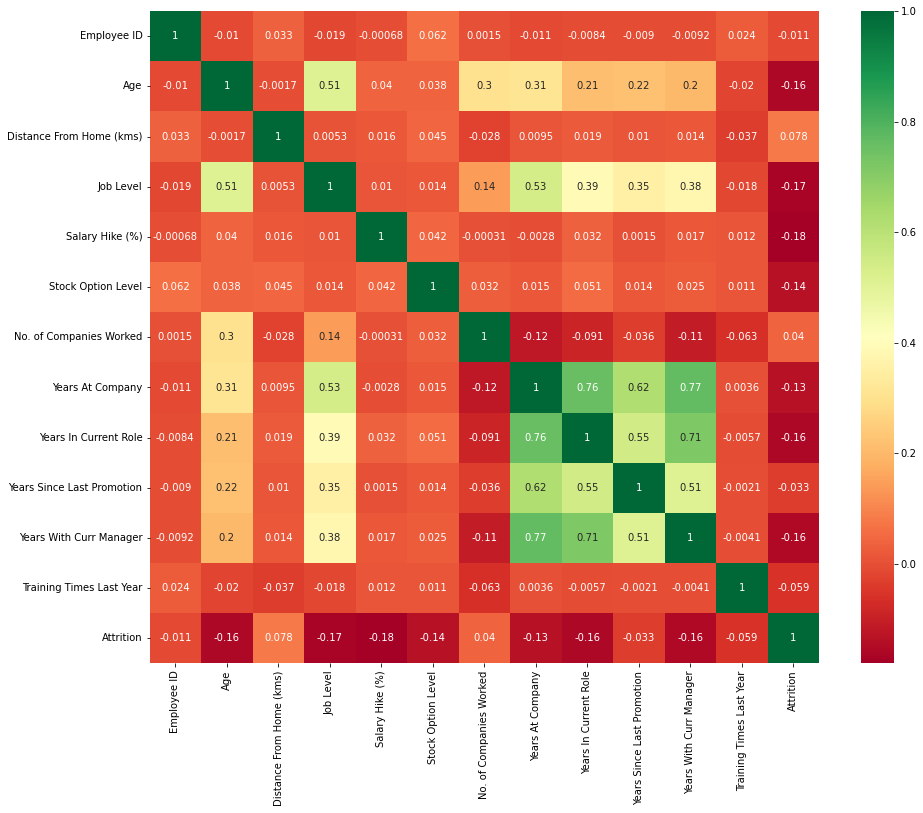

In [21]:
#Let's see the heatmap once again
corr = df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr,annot=True,cmap='RdYlGn')
plt.show()

> We see 'Years At Company' also has strong correlations with 'Years with Curr Manager' and 'Years in Current Role'.
But I think these columns might be important so we won't remove them.

> Also, we see that Attrition is most negatively correlated with Salary Hike %. It means, more the salary hike, less attrition.

**Columns/Features which might be responsible for attrition:** <br>
    1. Salary Hike % <br>
    2. Yeas with current manager <br>
    3. Years in Current Role <br>
    4. Years at a Company <br>
    5. Job Level <br>
    6. Stock Option Level <br>
    7. Age <br>
    8. Years Since Last Promotion

In [22]:
#let's try to understand Stock Option Level
df['Stock Option Level'].value_counts()

0    631
1    596
2    158
3     85
Name: Stock Option Level, dtype: int64

<AxesSubplot:xlabel='Stock Option Level', ylabel='count'>

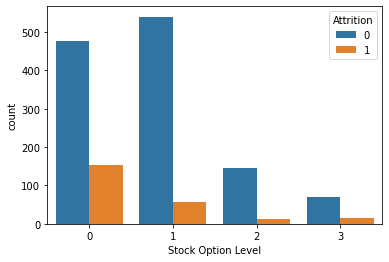

In [23]:
sns.countplot(data=df,x='Stock Option Level',hue='Attrition')

In [24]:
#Delete Attrition (Yes/No) column since we have our new Attrition column now.
df.drop(columns=['Attrition (Yes/No)'],inplace=True,axis=1)

In [25]:
df.head()

,Employee ID,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,Distance From Home (kms),...,No. of Companies Worked,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition
0,1,Sales,Sales Executive,Female,41,Single,College,Life Sciences,Travel_Rarely,1,...,2,6,4,0,5,Medium,0,Bad,Low,1
1,2,Research & Development,Research Scientist,Male,49,Married,Below College,Life Sciences,Travel_Frequently,8,...,1,10,7,1,7,High,3,Better,Very High,0
2,4,Research & Development,Laboratory Technician,Male,37,Single,College,Other,Travel_Rarely,2,...,6,0,0,0,0,Low,3,Bad,Medium,1
3,5,Research & Development,Research Scientist,Female,33,Married,Master,Life Sciences,Travel_Frequently,3,...,1,8,7,3,0,Very High,3,Better,High,0
4,7,Research & Development,Laboratory Technician,Male,27,Married,Below College,Medical,Travel_Rarely,2,...,9,2,2,2,2,Low,3,Better,Very High,0


# Now, let's come to our categorical columns

In [26]:
#Create a separate df for categorical columns
cat_df = df.select_dtypes(include='object').copy()
cat_df.head()

,Department,Job Role,Gender,Marital Status,Education,Education Field,Business Travel,Job Involvement,Job Satisfaction,Over Time,Environment Satisfaction,Work Life Balance,Relationship Satisfaction
0,Sales,Sales Executive,Female,Single,College,Life Sciences,Travel_Rarely,High,Very High,Yes,Medium,Bad,Low
1,Research & Development,Research Scientist,Male,Married,Below College,Life Sciences,Travel_Frequently,Medium,Medium,No,High,Better,Very High
2,Research & Development,Laboratory Technician,Male,Single,College,Other,Travel_Rarely,Medium,High,Yes,Low,Bad,Medium
3,Research & Development,Research Scientist,Female,Married,Master,Life Sciences,Travel_Frequently,High,High,Yes,Very High,Better,High
4,Research & Development,Laboratory Technician,Male,Married,Below College,Medical,Travel_Rarely,High,Medium,No,Low,Better,Very High


In [27]:
cat_df['Marital Status'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

<AxesSubplot:xlabel='Marital Status', ylabel='count'>

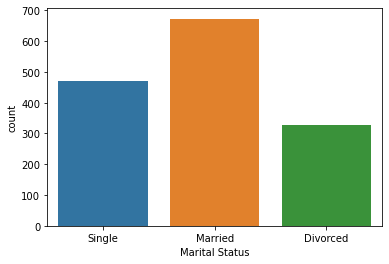

In [28]:
sns.countplot(data=cat_df,x='Marital Status')

In [29]:
#Let's look at the relationship between MaritaL Status and Attrition
cat_df['Attrition'] = df.loc[:,'Attrition'].copy()
cat_df.head()

,Department,Job Role,Gender,Marital Status,Education,Education Field,Business Travel,Job Involvement,Job Satisfaction,Over Time,Environment Satisfaction,Work Life Balance,Relationship Satisfaction,Attrition
0,Sales,Sales Executive,Female,Single,College,Life Sciences,Travel_Rarely,High,Very High,Yes,Medium,Bad,Low,1
1,Research & Development,Research Scientist,Male,Married,Below College,Life Sciences,Travel_Frequently,Medium,Medium,No,High,Better,Very High,0
2,Research & Development,Laboratory Technician,Male,Single,College,Other,Travel_Rarely,Medium,High,Yes,Low,Bad,Medium,1
3,Research & Development,Research Scientist,Female,Married,Master,Life Sciences,Travel_Frequently,High,High,Yes,Very High,Better,High,0
4,Research & Development,Laboratory Technician,Male,Married,Below College,Medical,Travel_Rarely,High,Medium,No,Low,Better,Very High,0


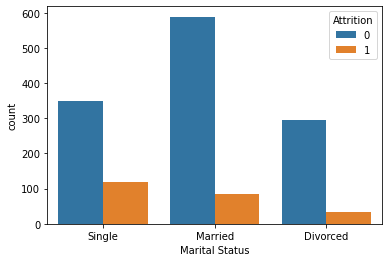

In [30]:
sns.countplot(data=cat_df,x='Marital Status',hue='Attrition')
plt.show()

In [31]:
calculate_attrition_rate(cat_df,'Marital Status')

,Category,Attrition Rate
0,Single,25.531915
1,Married,12.481426
2,Divorced,10.091743


> **Single Employees have the most attrition rate.** <br>
> This could be one of the driving factors for attrition rate.

In [32]:
cat_df.columns

Index(['Department', 'Job Role', 'Gender', 'Marital Status', 'Education',
       'Education Field', 'Business Travel', 'Job Involvement',
       'Job Satisfaction', 'Over Time', 'Environment Satisfaction',
       'Work Life Balance', 'Relationship Satisfaction', 'Attrition'],
      dtype='object')

In [33]:
#Education Field
cat_df['Education'].unique()

array(['College', 'Below College', 'Master', 'Bachelor', 'Doctor'],
      dtype=object)

In [34]:
cat_df['Education'].value_counts()

Bachelor         572
Master           398
College          282
Below College    170
Doctor            48
Name: Education, dtype: int64

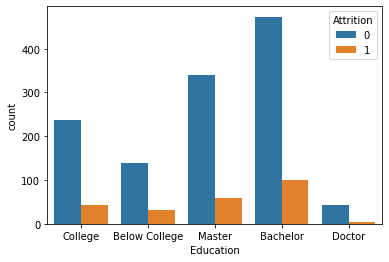

In [35]:
sns.countplot(data=cat_df,x='Education',hue='Attrition')
plt.show()

In [36]:
calculate_attrition_rate(cat_df,'Education')

,Category,Attrition Rate
1,Below College,18.235294
3,Bachelor,17.307692
0,College,15.602837
2,Master,14.572864
4,Doctor,10.416667


> **Attrition Rate is almost similar among categories of different Education, hence we can drop this column.**

In [37]:
calculate_attrition_rate(cat_df,'Education Field')

,Category,Attrition Rate
5,Human Resources,25.925926
4,Technical Degree,24.242424
3,Marketing,22.012579
0,Life Sciences,14.686469
2,Medical,13.577586
1,Other,13.414634


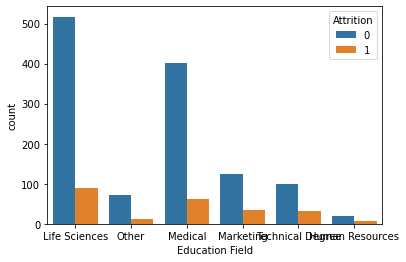

In [38]:
sns.countplot(data=cat_df,x='Education Field',hue='Attrition')
plt.show()

> **We can delete Education Field column as well**

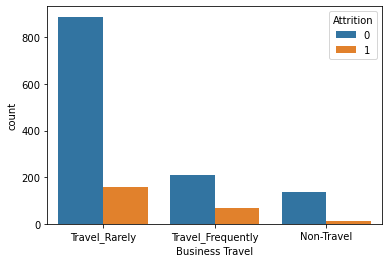

In [39]:
#Checking Business Travel Column. This might be interesting.
sns.countplot(data=cat_df,x='Business Travel',hue='Attrition')
plt.show()

In [40]:
calculate_attrition_rate(cat_df,'Business Travel')

,Category,Attrition Rate
1,Travel_Frequently,24.909747
0,Travel_Rarely,14.956855
2,Non-Travel,8.000000


**Huge Insight:**
> 1. People who have to travel frequently have the highest attrition rate.
> 2. People who don't travel have the least attrition rate which is best for organization.

In [41]:
cols_list = list(cat_df.columns)
cols_list

['Department',
 'Job Role',
 'Gender',
 'Marital Status',
 'Education',
 'Education Field',
 'Business Travel',
 'Job Involvement',
 'Job Satisfaction',
 'Over Time',
 'Environment Satisfaction',
 'Work Life Balance',
 'Relationship Satisfaction',
 'Attrition']

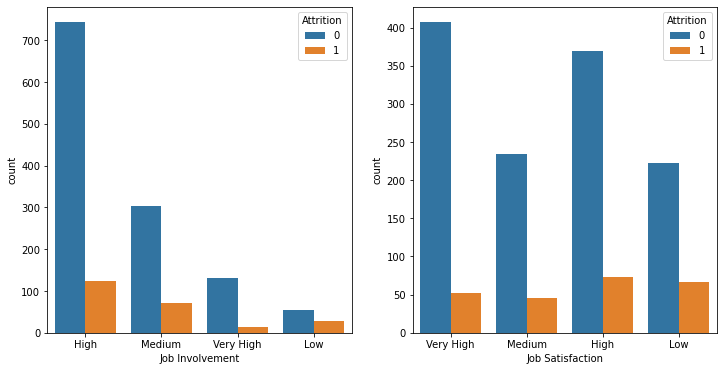

In [42]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))
sns.countplot(data=cat_df,x='Job Involvement',hue='Attrition',ax=ax1)
sns.countplot(data=cat_df,x='Job Satisfaction',hue='Attrition',ax=ax2)
plt.show()

In [43]:
calculate_attrition_rate(cat_df,'Job Involvement')

,Category,Attrition Rate
3,Low,33.734940
1,Medium,18.933333
0,High,14.400922
2,Very High,9.027778


In [44]:
calculate_attrition_rate(cat_df,'Job Satisfaction')

,Category,Attrition Rate
3,Low,22.837370
2,High,16.515837
1,Medium,16.428571
0,Very High,11.328976


**Insights:**
> 1. Employees like to get involved in their job. As the job involvement decreases, there is huge rise in attrition rate.
> 2. Employees with low job satisfaction have high attrition rate.

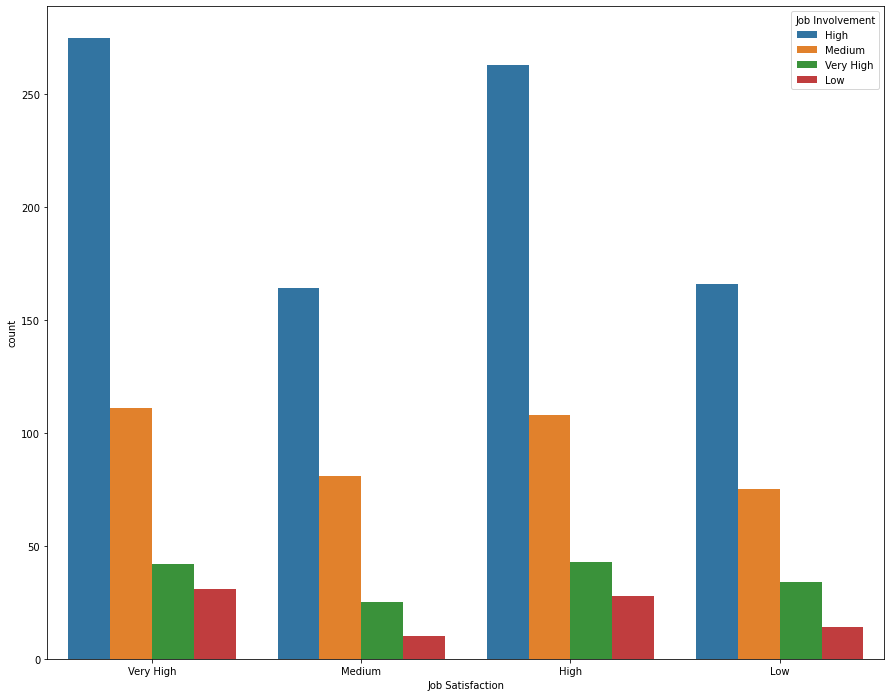

In [45]:
plt.figure(figsize=(15,12))
sns.countplot(data=cat_df,x='Job Satisfaction',hue='Job Involvement')
plt.show()

In [46]:
cat_df.head()

,Department,Job Role,Gender,Marital Status,Education,Education Field,Business Travel,Job Involvement,Job Satisfaction,Over Time,Environment Satisfaction,Work Life Balance,Relationship Satisfaction,Attrition
0,Sales,Sales Executive,Female,Single,College,Life Sciences,Travel_Rarely,High,Very High,Yes,Medium,Bad,Low,1
1,Research & Development,Research Scientist,Male,Married,Below College,Life Sciences,Travel_Frequently,Medium,Medium,No,High,Better,Very High,0
2,Research & Development,Laboratory Technician,Male,Single,College,Other,Travel_Rarely,Medium,High,Yes,Low,Bad,Medium,1
3,Research & Development,Research Scientist,Female,Married,Master,Life Sciences,Travel_Frequently,High,High,Yes,Very High,Better,High,0
4,Research & Development,Laboratory Technician,Male,Married,Below College,Medical,Travel_Rarely,High,Medium,No,Low,Better,Very High,0


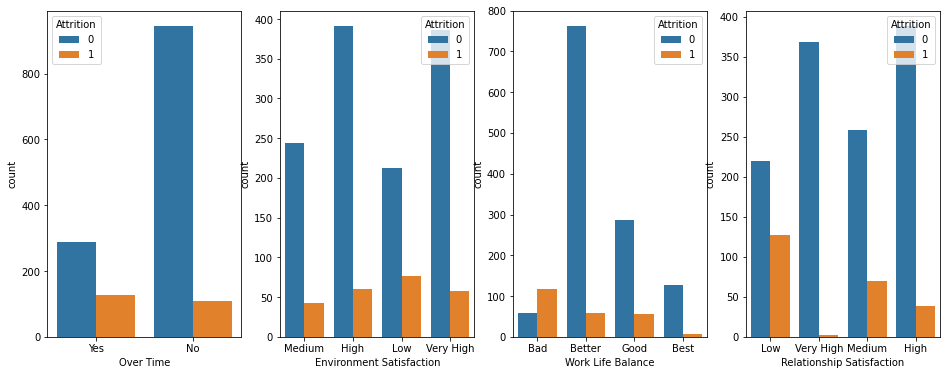

In [47]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16,6))
sns.countplot(data=cat_df,x='Over Time',hue='Attrition',ax=ax1)
sns.countplot(data=cat_df,x='Environment Satisfaction',hue='Attrition',ax=ax2)
sns.countplot(data=cat_df,x='Work Life Balance',hue='Attrition',ax=ax3)
sns.countplot(data=cat_df,x='Relationship Satisfaction',hue='Attrition',ax=ax4)
plt.show()

In [48]:
calculate_attrition_rate(cat_df,'Over Time')

,Category,Attrition Rate
0,Yes,30.528846
1,No,10.436433


**High Attrition Rate when employees have to do Over Time.**

In [49]:
calculate_attrition_rate(cat_df,'Environment Satisfaction')

,Category,Attrition Rate
2,Low,26.388889
0,Medium,14.982578
1,High,13.303769
3,Very High,13.063063


**Employees don't want a very high satisfactory environment but it should be decent enough. A really bad environment could be a driver for attrition rates.**

In [50]:
calculate_attrition_rate(cat_df,'Work Life Balance')

,Category,Attrition Rate
0,Bad,66.666667
2,Good,16.129032
1,Better,7.073171
3,Best,4.545455


**Huge Insight:**
>**Bad Work Life Balance literally drives away the employee. Highest Attrition Rate in the data.**

In [51]:
calculate_attrition_rate(cat_df,'Relationship Satisfaction')

,Category,Attrition Rate
0,Low,36.705202
2,Medium,21.341463
3,High,8.920188
1,Very High,0.540541


**Insights:** <br>
>1. Low relationship satisfaction results in a high attrition rate.
>2. Very High satisfaction has such low Attrition Rate.

# Summary of Insights

**1. Data is quite inconsistent because we have around 65% of employee from R&D Department, 30% from Sales and only 5% from HR Department.** <br>
**2. We could clearly see as Job Level rises, monthly income will rise as well. <br>**
That's why having both these 2 columns for our model would be harmful hence we should remove 1 of them. <br>
**3. Single Employees have the most attrition rate.** <br>
This could be one of the driving factors for attrition rate. <br>
**4. Attrition Rate is almost similar among categories of different Education, hence we can drop this column.Similar for Education Field column.** <br>
**5. People who have to travel frequently have the highest attrition rate** <br>
**6. People who don't travel have the least attrition rate which is best for organization.**<br>
**7. Employees like to get involved in their job. As the job involvement decreases, there is huge rise in attrition rate.** <br>
**8. Employees with low job satisfaction have high attrition rate.** <br>
**9. High Attrition Rate when employees have to do Over Time.** <br>
**10. Employees don't want a very high satisfactory environment but it should be decent enough. A really bad environment could be a driver for attrition rates.** <br>
**11. Bad Work Life Balance literally drives away the employee. Highest Attrition Rate in the data.** <br>
**12. Low relationship satisfaction results in a high attrition rate.** <br>
Very High satisfaction has such low Attrition Rate.

# Key Driver Factors for Modeling

>1. Salary Hike %
2. Years with current manager
3. Years in Current Role
4. Years at a Company
5. Job Level
6. Stock Option Level
7. Age
8. Marital Status
9. Business Travel
10. Job Satisfaction
11. Job Involvement
12. Over Time
13. Environment Satisfaction
14. Work Life Balance
15. Relationship Satisfaction
16. Department
17. Job Role
18. Gender
19. Years Since Last Promotion

# Data Pre-Processing

In [52]:
df.head()

,Employee ID,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,Distance From Home (kms),...,No. of Companies Worked,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition
0,1,Sales,Sales Executive,Female,41,Single,College,Life Sciences,Travel_Rarely,1,...,2,6,4,0,5,Medium,0,Bad,Low,1
1,2,Research & Development,Research Scientist,Male,49,Married,Below College,Life Sciences,Travel_Frequently,8,...,1,10,7,1,7,High,3,Better,Very High,0
2,4,Research & Development,Laboratory Technician,Male,37,Single,College,Other,Travel_Rarely,2,...,6,0,0,0,0,Low,3,Bad,Medium,1
3,5,Research & Development,Research Scientist,Female,33,Married,Master,Life Sciences,Travel_Frequently,3,...,1,8,7,3,0,Very High,3,Better,High,0
4,7,Research & Development,Laboratory Technician,Male,27,Married,Below College,Medical,Travel_Rarely,2,...,9,2,2,2,2,Low,3,Better,Very High,0


In [53]:
df.select_dtypes(include='object')

,Department,Job Role,Gender,Marital Status,Education,Education Field,Business Travel,Job Involvement,Job Satisfaction,Over Time,Environment Satisfaction,Work Life Balance,Relationship Satisfaction
0,Sales,Sales Executive,Female,Single,College,Life Sciences,Travel_Rarely,High,Very High,Yes,Medium,Bad,Low
1,Research & Development,Research Scientist,Male,Married,Below College,Life Sciences,Travel_Frequently,Medium,Medium,No,High,Better,Very High
2,Research & Development,Laboratory Technician,Male,Single,College,Other,Travel_Rarely,Medium,High,Yes,Low,Bad,Medium
3,Research & Development,Research Scientist,Female,Married,Master,Life Sciences,Travel_Frequently,High,High,Yes,Very High,Better,High
4,Research & Development,Laboratory Technician,Male,Married,Below College,Medical,Travel_Rarely,High,Medium,No,Low,Better,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Research & Development,Laboratory Technician,Male,Married,College,Medical,Travel_Frequently,Very High,Very High,No,High,Better,High
1466,Research & Development,Healthcare Representative,Male,Married,Below College,Medical,Travel_Rarely,Medium,Low,No,Very High,Better,Low
1467,Research & Development,Manufacturing Director,Male,Married,Bachelor,Life Sciences,Travel_Rarely,Very High,Medium,Yes,Medium,Better,Medium
1468,Sales,Sales Executive,Male,Married,Bachelor,Medical,Travel_Frequently,Medium,Medium,No,Very High,Good,Very High


In [54]:
df.select_dtypes(include='int')

,Employee ID,Age,Distance From Home (kms),Job Level,Salary Hike (%),Stock Option Level,No. of Companies Worked,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Training Times Last Year,Attrition
0,1,41,1,2,11,0,2,6,4,0,5,0,1
1,2,49,8,2,23,1,1,10,7,1,7,3,0
2,4,37,2,1,15,0,6,0,0,0,0,3,1
3,5,33,3,1,11,0,1,8,7,3,0,3,0
4,7,27,2,1,12,1,9,2,2,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,36,23,2,17,1,4,5,2,0,3,3,0
1466,2062,39,6,3,15,1,4,7,7,1,7,5,0
1467,2064,27,4,2,20,1,1,6,2,0,3,0,0
1468,2065,49,2,2,14,0,2,9,6,0,8,3,0


In [55]:
ds = df.loc[:,['Department','Job Role','Gender','Marital Status','Business Travel','Job Involvement','Job Satisfaction','Over Time','Environment Satisfaction','Work Life Balance','Relationship Satisfaction',
           'Age','Job Level','Salary Hike (%)','Stock Option Level','Years At Company','Years In Current Role','Years Since Last Promotion',
           'Years With Curr Manager','Attrition']].copy()
ds.head()

,Department,Job Role,Gender,Marital Status,Business Travel,Job Involvement,Job Satisfaction,Over Time,Environment Satisfaction,Work Life Balance,Relationship Satisfaction,Age,Job Level,Salary Hike (%),Stock Option Level,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Attrition
0,Sales,Sales Executive,Female,Single,Travel_Rarely,High,Very High,Yes,Medium,Bad,Low,41,2,11,0,6,4,0,5,1
1,Research & Development,Research Scientist,Male,Married,Travel_Frequently,Medium,Medium,No,High,Better,Very High,49,2,23,1,10,7,1,7,0
2,Research & Development,Laboratory Technician,Male,Single,Travel_Rarely,Medium,High,Yes,Low,Bad,Medium,37,1,15,0,0,0,0,0,1
3,Research & Development,Research Scientist,Female,Married,Travel_Frequently,High,High,Yes,Very High,Better,High,33,1,11,0,8,7,3,0,0
4,Research & Development,Laboratory Technician,Male,Married,Travel_Rarely,High,Medium,No,Low,Better,Very High,27,1,12,1,2,2,2,2,0


In [56]:
ds.shape

(1470, 20)

In [57]:
#We have reduced the number of columns to 20. Great!

### Setting Dependent and Independent variables

In [58]:
X = ds.iloc[:,:-1].values
y=ds.iloc[:,-1].values
print(X)
print(y)

[['Sales' 'Sales Executive' 'Female' ... 4 0 5]
 ['Research & Development' 'Research Scientist' 'Male' ... 7 1 7]
 ['Research & Development' 'Laboratory Technician' 'Male' ... 0 0 0]
 ...
 ['Research & Development' 'Manufacturing Director' 'Male' ... 2 0 3]
 ['Sales' 'Sales Executive' 'Male' ... 6 0 8]
 ['Research & Development' 'Laboratory Technician' 'Male' ... 3 1 2]]
[1 0 1 ... 0 0 0]


### Encoding the Independent Variables

In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [60]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,1,2,3,4,5,6,7,8,9,10])],remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [61]:
print(X)

[[0.0 0.0 1.0 ... 4 0 5]
 [0.0 1.0 0.0 ... 7 1 7]
 [0.0 1.0 0.0 ... 0 0 0]
 ...
 [0.0 1.0 0.0 ... 2 0 3]
 [0.0 0.0 1.0 ... 6 0 8]
 [0.0 1.0 0.0 ... 3 1 2]]


In [62]:
X.shape

(1470, 50)

### Splitting dataset into training and test set

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [64]:
print(X_train[0,42:])
#print(X_train)

[58 4 13 1 1 0 0 0]


In [65]:
X_train.shape

(1176, 50)

In [66]:
print(X_test)

[[0.0 0.0 1.0 ... 3 9 7]
 [0.0 1.0 0.0 ... 3 0 2]
 [0.0 0.0 1.0 ... 2 3 2]
 ...
 [0.0 0.0 1.0 ... 7 7 7]
 [0.0 1.0 0.0 ... 0 0 0]
 [0.0 1.0 0.0 ... 0 0 0]]


In [67]:
print(y_train)

[0 0 0 ... 0 0 0]


In [68]:
print(y_test)

[0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0]


### Feature Scaling

In [69]:
from sklearn.preprocessing  import StandardScaler
sc = StandardScaler()
#Gives value between -3 to +3
#We do not standardize our dummy variables.
X_train[:,42:] = sc.fit_transform(X_train[:,42:])
X_test[:,42:] = sc.transform(X_test[:,42:])

In [70]:
print(X_train[0,42:])

[2.3389367036100883 1.759027295888783 -0.5394871849927129
 0.22505569171608666 -0.9820078512815037 -1.1568405801129382
 -0.6738150570956313 -1.1504388612192216]


In [71]:
print(X_test[0,42:])

[-0.08886551888941858 0.8545165394544985 -0.256887216372922
 -0.9306888212014588 0.49540097572111685 -0.3303250745158451
 2.132819560889478 0.8143770527966774]


### Machine Learning Classification Models
>1. Logistic Regression
2. KNN
3. SVM
4. Kernel SVM
5. Naive Bayes
6. Decision Tree Classification
7. Random Forest Classification

# Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [73]:
#### Predicting test results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]

In [74]:
#### Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[240   5]
 [ 23  26]]


0.9047619047619048

**Logistic Regression Model - 90.5% accuracy.**

# KNN Classifier

In [75]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2)
classifier.fit(X_train,y_train)
#Predicting test result
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))
#### Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[244   1]
 [ 36  13]]


0.8741496598639455

**KNN Classifier Model - 87.4% accuracy.**

# SVM Classifier

In [76]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state=0)
classifier.fit(X_train,y_train)
#Predicting test result
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))
#### Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[241   4]
 [ 30  19]]


0.8843537414965986

**SVM Classifier Model - 88.4% accuracy.**

# Decision Tree Classification

In [77]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)
#Predicting test result
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))
#### Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[224  21]
 [ 22  27]]


0.8537414965986394

**Decision Tree Classifier Model - 85.3% accuracy.**

In [78]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50,random_state=0)
classifier.fit(X_train,y_train)
#Predicting test result
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))
#### Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[241   4]
 [ 30  19]]


0.8843537414965986

**Random Forest Classifier Model - 88.4% accuracy.**

# Result

**We should use Logistic Regression Model (90.5% accuracy) since it gives us more than 90% accurate results.**